In [2]:
import matplotlib.pyplot as plt
import os
import re

In [3]:
def extract_fid_from_file(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'FID:\s*([0-9]*\.?[0-9]+)', line)
            if match:
                return float(match.group(1))
    return None

directory = "./"

fid_scores = {}
for filename in os.listdir(directory):
    if filename.startswith("SiT-XL-2") and filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        fid = extract_fid_from_file(file_path)
        if fid is not None:
            fid_scores[filename] = fid

In [4]:
fid_scores

{'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.5-glo-0.0-ghi-0.7-skip-[19]-samples-5000-seed-0-sde.txt': 11.068830107711563,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-2.0-glo-0.0-ghi-0.6-skip-[6]-samples-5000-seed-0-sde.txt': 8.986244269965766,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.5-glo-0.0-ghi-0.7-skip-[17]-samples-5000-seed-0-sde.txt': 10.83714478663353,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.5-glo-0.0-ghi-0.7-skip-[20]-samples-5000-seed-0-sde.txt': 11.162189507380504,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-2.0-glo-0.0-ghi-0.8-skip-[6]-samples-5000-seed-0-sde.txt': 10.24894777059734,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.5-glo-0.0-ghi-0.7-skip-[3]-samples-5000-seed-0-sde.txt': 10.730750110637018,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.5-glo-0.0-ghi-1.0-skip-[6]-samples-5000-seed-0-sde.txt': 8.991135705197507,
 'SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-2.0-glo-0.0-ghi-0.7-skip-[6]-samples-5000-seed-0-sde.txt

In [19]:
sweep6 = [(file, score) for file, score in fid_scores.items() if '[6]' in file]

In [20]:
sweep6.sort()

In [21]:
sweep6

[('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.1-glo-0.0-ghi-0.6-skip-[6]-samples-5000-seed-0-sde.txt',
  11.53185396487305),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.1-glo-0.0-ghi-0.7-skip-[6]-samples-5000-seed-0-sde.txt',
  11.243892501013306),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.1-glo-0.0-ghi-0.8-skip-[6]-samples-5000-seed-0-sde.txt',
  10.981344498821159),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.1-glo-0.0-ghi-0.9-skip-[6]-samples-5000-seed-0-sde.txt',
  10.828957149606083),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.1-glo-0.0-ghi-1.0-skip-[6]-samples-5000-seed-0-sde.txt',
  10.719767471927014),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.25-glo-0.0-ghi-0.6-skip-[6]-samples-5000-seed-0-sde.txt',
  10.059482461017808),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.25-glo-0.0-ghi-0.7-skip-[6]-samples-5000-seed-0-sde.txt',
  9.563239560771478),
 ('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.25-glo-0.0-ghi-0.8-skip-

In [23]:
min(sweep6, key=lambda x: x[1])

('SiT-XL-2-SiT-XL-2-256x256-size-256-vae-ema-cfg-1.5-glo-0.0-ghi-0.7-skip-[6]-samples-5000-seed-0-sde.txt',
 8.753661389272338)

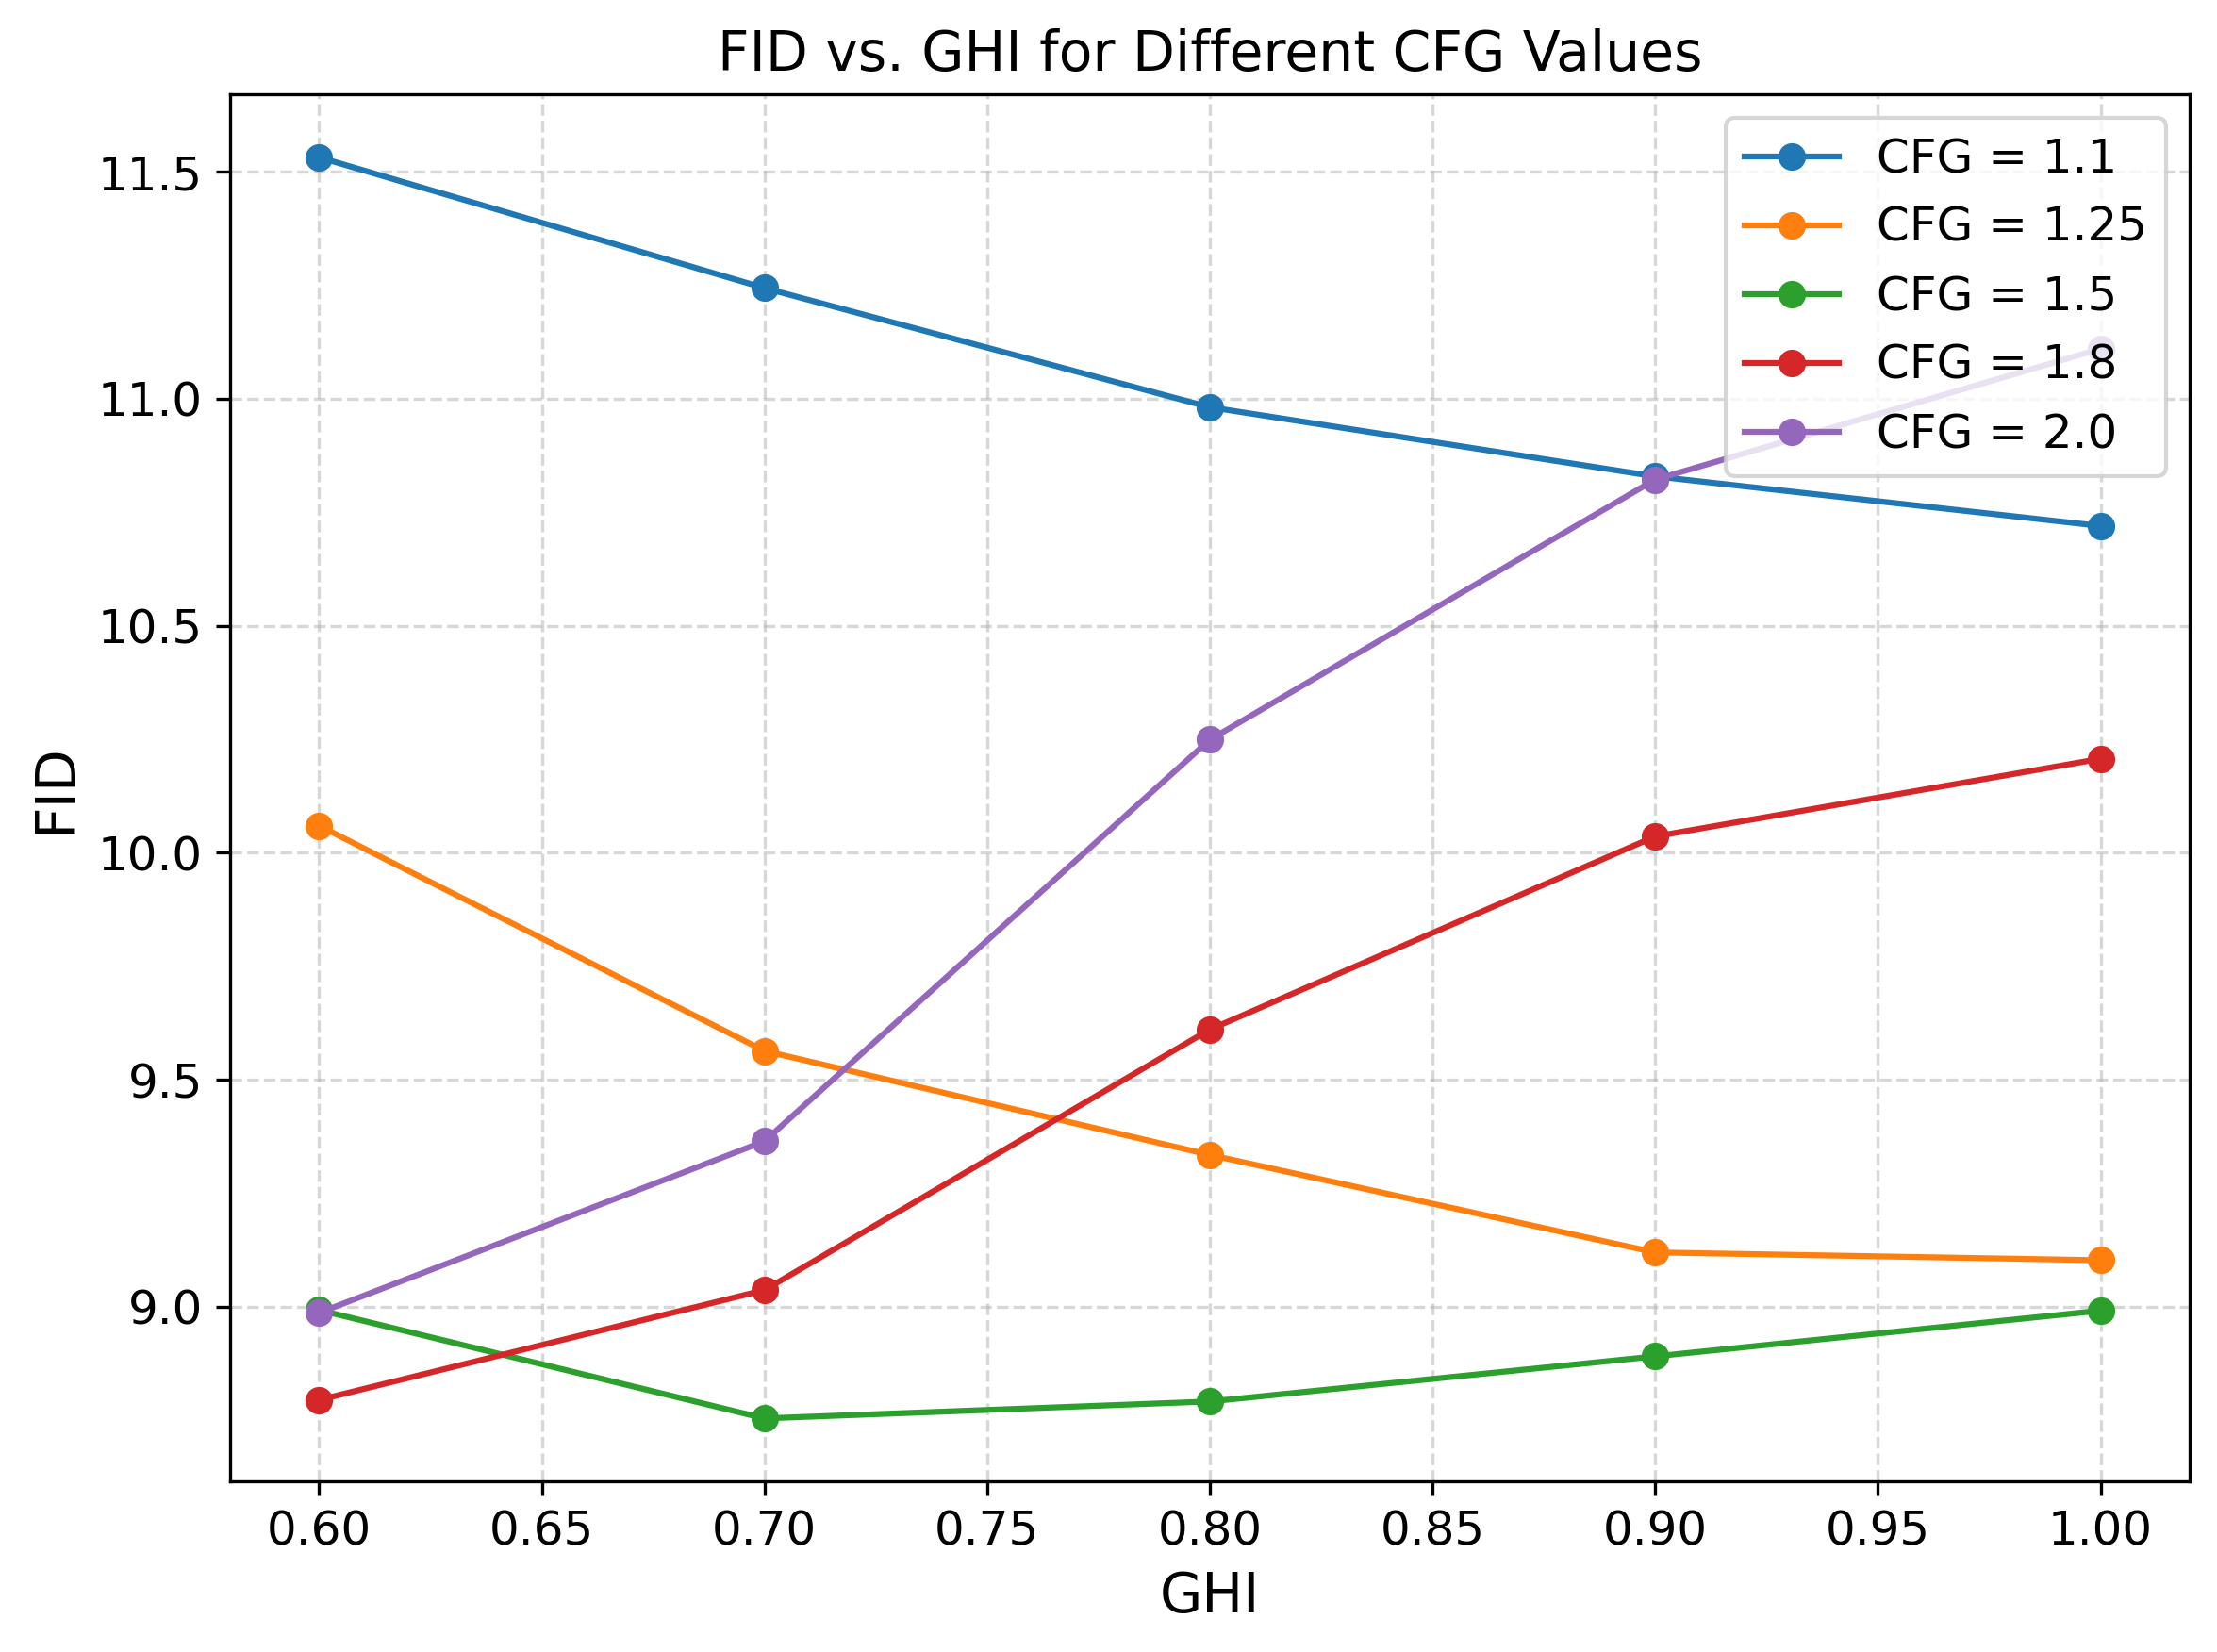

In [26]:
# We'll parse each filename to extract the 'cfg' and 'ghi' values
pattern = r"cfg-(\d+(\.\d+)*)-.*-ghi-(\d+(\.\d+)*)-"
# data_dict will map cfg -> another dict of ghi -> fid
data_dict = {}

for fname, fid_val in sweep6:
    match = re.search(pattern, fname)
    if match:
        cfg_str = match.group(1)  # e.g. "1.1"
        ghi_str = match.group(3)  # e.g. "0.6"
        cfg_val = float(cfg_str)
        ghi_val = float(ghi_str)
        if cfg_val not in data_dict:
            data_dict[cfg_val] = {}
        data_dict[cfg_val][ghi_val] = fid_val

# Sort the cfg values we care about
cfg_values = sorted(data_dict.keys())  # [1.1, 1.25, 1.5, 1.8, 2.0]

# Set up plot styling for publication-quality
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(8, 6))

for cfg in cfg_values:
    # We want ghi in ascending order
    x_vals = sorted(data_dict[cfg].keys())
    y_vals = [data_dict[cfg][x] for x in x_vals]
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', label=f'CFG = {cfg}')

plt.xlabel('GHI')
plt.ylabel('FID')
plt.title('FID vs. GHI for Different CFG Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(0.58, 1.02)  # a bit past 0.6 and 1.0
plt.legend()
plt.tight_layout()
plt.show()







In [83]:
lsg = []

for filename in fid_scores:
    if "1.5" in filename and "skip" in filename:
        match = re.search(r'\[(.*?)\]', filename)
        layer = match.group(1)
        lsg.append((int(layer), fid_scores[filename]))


In [84]:
lsg.sort()

In [45]:
lsg

[(0, 26.54144923783349),
 (1, 16.697317060045748),
 (2, 11.2273198161746),
 (3, 10.730750110637018),
 (4, 10.37365633552048),
 (5, 8.857827207344599),
 (6, 8.753661389272338),
 (7, 8.858510180458325),
 (8, 9.562609055334462),
 (9, 9.932358721421451),
 (10, 10.108495429369668),
 (11, 10.122102129209907),
 (12, 9.43425354160064),
 (13, 9.964237386330637),
 (14, 10.55865053487895),
 (15, 10.143915523701764),
 (16, 10.824074634755732),
 (17, 10.83714478663353),
 (18, 9.929113888778431),
 (19, 11.068830107711563),
 (20, 11.162189507380504)]

In [46]:
layers = [i[0] for i in lsg]
scores = [i[1] for i in lsg]

In [47]:
cfg_interval = 8.45
no_guidance = 13.14

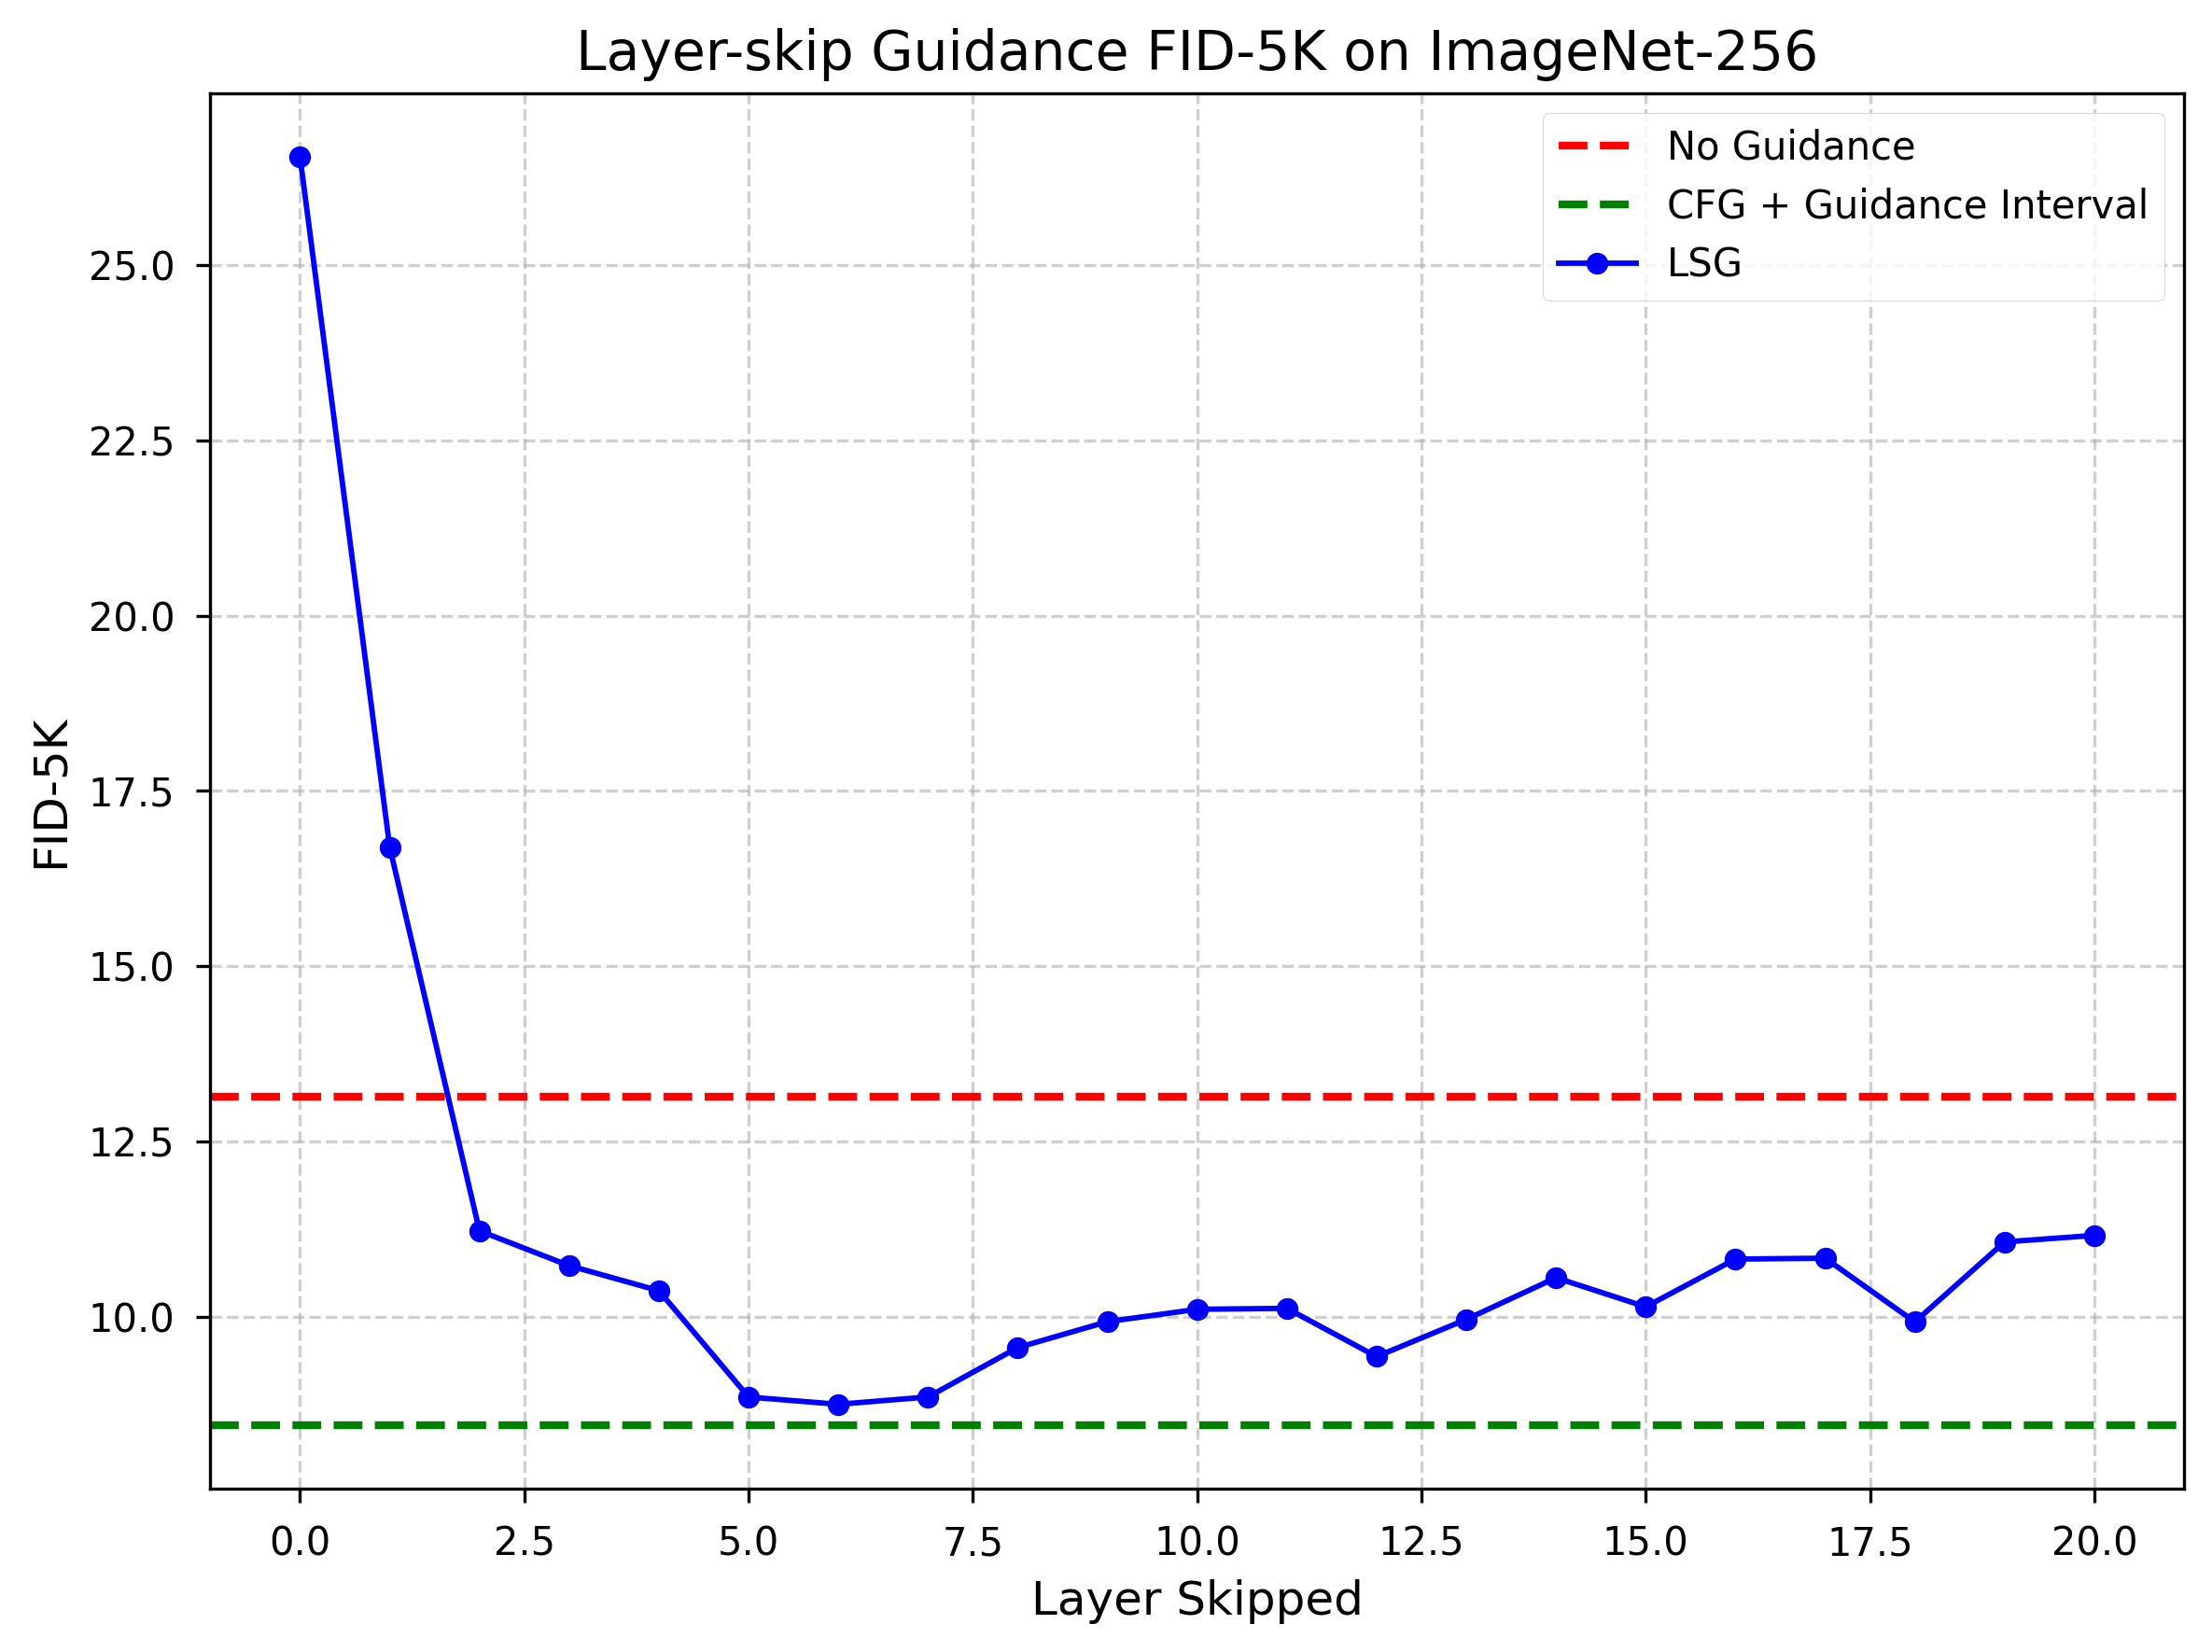

In [48]:
# Set publication-quality settings
plt.style.use('seaborn-v0_8-paper')  # Use a clean style for publication
plt.figure(figsize=(8, 6), dpi=300)  # High resolution

# Plot horizontal lines
plt.axhline(y=no_guidance, color='red', linestyle='--', linewidth=2, label='No Guidance')
plt.axhline(y=cfg_interval, color='green', linestyle='--', linewidth=2, label='CFG + Guidance Interval')

# Add labels, title, and legend
plt.title("Layer-skip Guidance FID-5K on ImageNet-256", fontsize=14)
plt.xlabel("Layer Skipped", fontsize=12)
plt.ylabel("FID-5K", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.plot(layers, scores, linestyle='-', marker='o', color='b', label='LSG')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, loc="best")

# Save as a publication-quality figure
plt.tight_layout()
plt.savefig("lsg.png", dpi=300)

# Show the plot
plt.show()
